# Chapter 11

# 11.8.1. Sensitivity analysis of PK/PD parameters

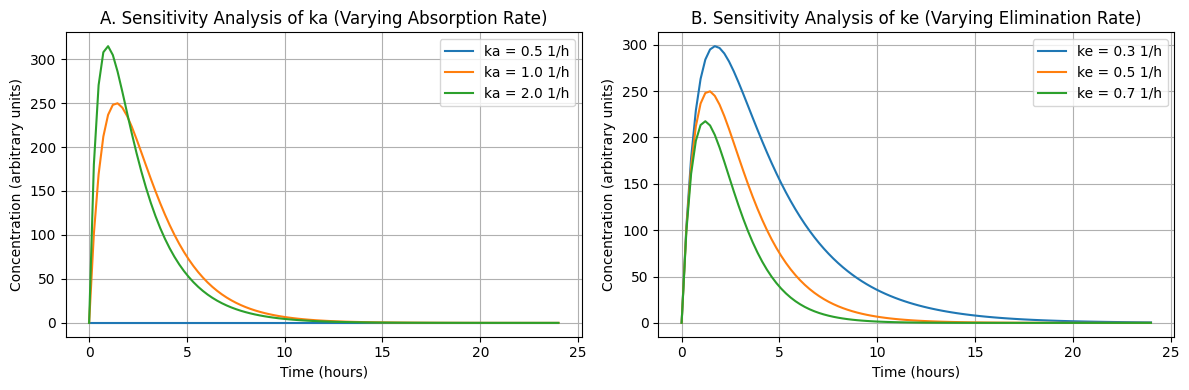

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the one-compartment PK model
def pk_model(t, ka, ke, dose):
    if ka == ke:
        # Avoid division by zero
        return np.zeros_like(t)
    concentration = (dose * ka / (ka - ke)) * (np.exp(-ke * t) - np.exp(-ka * t))
    return concentration

# Time points
time = np.linspace(0, 24, 100)

# Dose in mg
dose = 500

# Vary ka and ke for sensitivity analysis
ka_values = [0.5, 1.0, 2.0]  # Absorption rate constants (1/hour)
ke_values = [0.3, 0.5, 0.7]  # Elimination rate constants (1/hour)

# Plot the concentration-time curves for different ka values
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
for ka in ka_values:
    concentration = pk_model(time, ka, 0.5, dose)  # Keep ke constant at 0.5 1/hour
    ax[0].plot(time, concentration, label=f'ka = {ka} 1/h')

ax[0].set_xlabel('Time (hours)')
ax[0].set_ylabel('Concentration (arbitrary units)')
ax[0].set_title('A. Sensitivity Analysis of ka (Varying Absorption Rate)')
ax[0].legend()
ax[0].grid(True)

# Plot the concentration-time curves for different ke values
for ke in ke_values:
    concentration = pk_model(time, 1.0, ke, dose)  # Keep ka constant at 1.0 1/hour
    ax[1].plot(time, concentration, label=f'ke = {ke} 1/h')

ax[1].set_xlabel('Time (hours)')
ax[1].set_ylabel('Concentration (arbitrary units)')
ax[1].set_title('B. Sensitivity Analysis of ke (Varying Elimination Rate)')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()